# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## Clean Data

### Hanlde Missing Data

In [60]:
df_flights.isna().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [61]:
DepDel15_filter = df_flights['DepDel15'].isna()
df_flights[DepDel15_filter]['DepDelay']


171       0
359       0
429       0
545       0
554       0
         ..
271410    0
271607    0
271634    0
271671    0
271885    0
Name: DepDelay, Length: 2761, dtype: int64

In [62]:
df_flights[DepDel15_filter]['DepDelay'].describe()

count    2761.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: DepDelay, dtype: float64

In [63]:
df_flights_imputed = df_flights.copy()
df_flights_imputed['DepDel15'] = df_flights_imputed['DepDel15'].fillna(0)

In [64]:
df_flights_imputed.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### Remove outliers

<AxesSubplot: >

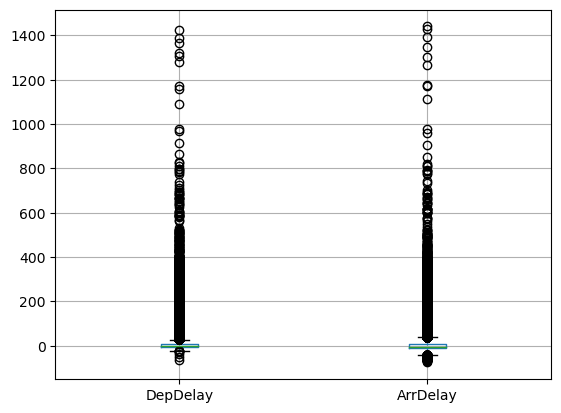

In [65]:
df_flights_imputed.boxplot(column = ['DepDelay', 'ArrDelay'])

In [66]:
def filter_outliers(
    df,
    columns,
    min_quantile = 0.05,
    max_quantile = 0.95):

    df_filtered = df.copy()

    for col in columns:
        min = df[col].quantile(min_quantile)
        max = df[col].quantile(max_quantile)

        min_filter = df_filtered[col] > min
        max_filter = df_filtered[col] > max

        df_filtered = df_filtered[min_filter & max_filter]

    n_rows_start = len(df)
    n_rows_end = len(df_filtered)
    n_rows_delta = n_rows_start - n_rows_end

    print(f'Inout rows: {n_rows_start} | Output rows: {n_rows_end} | Rows removed: {n_rows_delta}')
    
    return df_filtered

In [68]:
df_flights_filtered = filter_outliers(df_flights_imputed, ['DepDelay', 'ArrDelay'])
df_flights_filtered

Inout rows: 271940 | Output rows: 11733 | Rows removed: 260207


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
5,2013,7,28,7,UA,12478,John F. Kennedy International,New York,NY,14771,San Francisco International,San Francisco,CA,1710,87,1.0,2035,183,1,0
13,2013,7,17,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13487,Minneapolis-St Paul International,Minneapolis,MN,2025,95,1.0,2245,90,1,0
41,2013,8,11,7,UA,14771,San Francisco International,San Francisco,CA,12478,John F. Kennedy International,New York,NY,1048,137,1.0,1920,151,1,0
54,2013,5,6,1,B6,12953,LaGuardia,New York,NY,11697,Fort Lauderdale-Hollywood International,Fort Lauderdale,FL,1455,88,1.0,1801,87,1,0
68,2013,9,19,4,WN,13232,Chicago Midway International,Chicago,IL,13796,Metropolitan Oakland International,Oakland,CA,1930,108,1.0,2200,105,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271826,2013,7,14,7,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,11618,Newark Liberty International,Newark,NJ,1640,114,1.0,2120,99,1,0
271833,2013,4,12,5,B6,15304,Tampa International,Tampa,FL,12953,LaGuardia,New York,NY,1855,97,1.0,2139,81,1,0
271864,2013,6,20,4,FL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13495,Louis Armstrong New Orleans International,New Orleans,LA,2110,112,1.0,2141,106,1,0
271866,2013,7,30,2,B6,12954,Long Beach Airport,Long Beach,CA,14893,Sacramento International,Sacramento,CA,1034,89,1.0,1152,85,1,0


## Explore data

### Summary statistics

In [69]:
df_flights_imputed.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.199092,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.399318,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


### Get data distribution

In [76]:
def show_distribution(df, column):
    dist = {}

    for col in column:
        dist[col] = {
                        'min': df[col].min(),
                        'mean': df[col].mean(),
                        'median': df[col].median(),
                        'mode': df[col].mode()[0],
                        'max': df[col].max()
                    }

    return dist

show_distribution(df_flights_filtered, ['DepDelay', 'ArrDelay'])

{'DepDelay': {'min': 71,
  'mean': 140.17403903519985,
  'median': 118.0,
  'mode': 92,
  'max': 1425},
 'ArrDelay': {'min': 72,
  'mean': 140.36768090002556,
  'median': 118.0,
  'mode': 90,
  'max': 1440}}

### Answer questions
- *What are the average (mean) departure and arrival delays?*
- *How do the carriers compare in terms of arrival delay performance?*
- *Is there a noticable difference in arrival delays for different days of the week?*
- *Which departure airport has the highest average departure delay?*
- *Do **late** departures tend to result in longer arrival delays than on-time departures?*
- *Which route (from origin airport to destination airport) has the most **late** arrivals?*
- *Which route has the highest average arrival delay?*